<a href="https://colab.research.google.com/github/rissicay/reinforcement_learning/blob/main/Exploration_vs_Exploitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploration vs Exploitation 

This report will use Q-value tracking to solve a maze. We will attempt to find the best gamma and epsilon values for the equation and to see if optimisitc initialisation can make a difference.

In [2]:
# install required system dependencies
!apt-get install -y xvfb x11-utils  
!apt-get install x11-utils > /dev/null 2>&1
!pip install PyOpenGL==3.1.* \
            PyOpenGL-accelerate==3.1.* \
            gym[box2d]==0.17.* 
!pip install pyglet
!pip install ffmpeg
! pip install pyvirtualdisplay
!pip install Image
!pip install gym-maze-trustycoder83

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [3]:
!mkdir ./vid
!rm ./vid/*.*

mkdir: cannot create directory ‘./vid’: File exists


In [4]:
import sys
import numpy as np
import gym
import gym_maze

from pyvirtualdisplay import Display
from gym.wrappers.monitoring import video_recorder



def get_rewards_per_episode(exploration_proba, discount_rate):
  d = Display()
  d.start()

  video_name = "./vid/Task2_2C.mp4"

  env = gym.make("maze-sample-10x10-v0")

  vid = video_recorder.VideoRecorder(env, video_name)

  current_state = env.reset()

  states_dict = {} # dict to keep the states and coordinates of the Q table
  count = 0
  for i in range(10):
    for j in range(10):
      states_dict[i, j] = count
      count +=1

  n_actions = env.action_space.n

  Q_table = np.zeros((len(states_dict), n_actions))

  # Number of episode we will run
  n_episodes = 10

  # Maximum of iteration per episode
  max_iter_episode = 500


  rewards_per_episode = list()

  for e in range(n_episodes):
    done = False

    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    n = np.zeros((len(states_dict), n_actions))
    

    for i in range(max_iter_episode):
      env.unwrapped.render()
      vid.capture_frame()

      current_coordinate_x = int(current_state[0])
      current_coordinate_y = int(current_state[1])

      current_Q_table_coordinates = states_dict[current_coordinate_x, current_coordinate_y]

      if np.random.uniform(0,1) < exploration_proba:
        action = env.action_space.sample()
      else:
        action = int(np.argmax(Q_table[current_Q_table_coordinates]))

      next_state, reward, done, _ = env.step(action)

      next_coordinate_x = int(next_state[0]) # get coordinates to be used in dictionary
      next_coordinate_y = int(next_state[1]) # get coordinates to be used in dictionary

      # Update our Q-table using the Q-value 
      n[current_Q_table_coordinates, action] = n[current_Q_table_coordinates, action] + 1
      next_Q_table_coordinates = states_dict[next_coordinate_x, next_coordinate_y]
      Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] + (1/n[current_Q_table_coordinates, action]) * (reward - (discount_rate * Q_table[current_Q_table_coordinates, action]))

      total_episode_reward = total_episode_reward + reward

      if done:
        break
      
      current_state = next_state
    
    #Show the total episode reward        
    print("Total episode reward:", total_episode_reward)
      
    #Reset enviroment for next episode
    current_state = env.reset()
      
    rewards_per_episode.append(total_episode_reward)

  print("Video successfuly saved.")
  vid.close()
  vid.enabled = False

  return rewards_per_episode



## Evaluation of Epsilion

The structure of the rewards of this maze make its slightly difficult to track average reward. Each step in the maze is given approximately -1. If the goal is met, a fixed amount if gave. Trying to compare with optimal action is also quite difficult. To evaluate a good epsilion, we will compare the cumulative reward given after multiple episodes. We will used a fixed value of gamma of 0.5 to get a proper evaluation.
<br>
<br>
We are getting quite weird results. The best values of epsilion appear to 0.9. Other notatable values are 0.1 and 0.6. These are 0.1 and 0.9 are at the opposite end of exploration and exploitation. 

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.6379999999999997
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.1 gamma 0.5


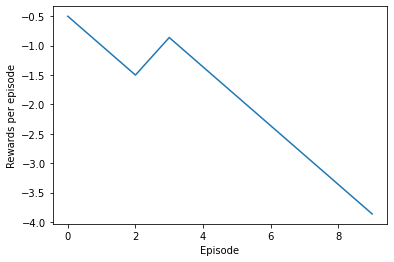

Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.3 gamma 0.5


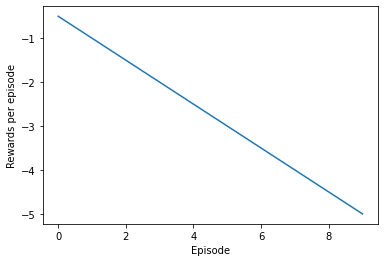

Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.6409999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.6 gamma 0.5


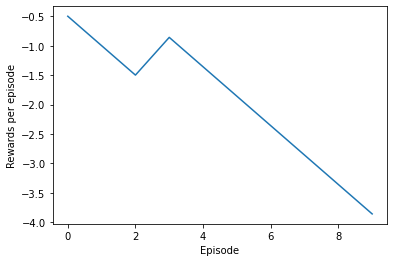

Total episode reward: 0.6549999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.6659999999999997
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.7529999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.9 gamma 0.5


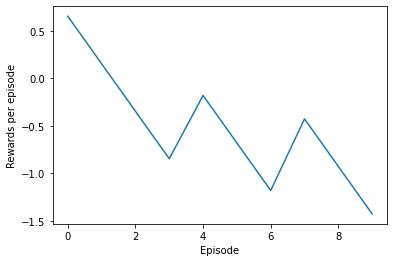

In [5]:
import matplotlib.pyplot as plt


plt.plot(np.cumsum(get_rewards_per_episode(0.1, 0.5)))
print("epsilon 0.1 gamma 0.5")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

plt.plot(np.cumsum(get_rewards_per_episode(0.3, 0.5)))
print("epsilon 0.3 gamma 0.5")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

plt.plot(np.cumsum(get_rewards_per_episode(0.6, 0.5)))
print("epsilon 0.6 gamma 0.5")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

plt.plot(np.cumsum(get_rewards_per_episode(0.9, 0.5)))
print("epsilon 0.9 gamma 0.5")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

## Evaluation of Gamma

We have a similar problem when trying to evaluate gamma as we did with epsilion. We will use the same method of comparing cumulative rewards to see which value is best. We will used a fixed value of epsilion of 0.5 to get a proper evaluation.
<br>
<br>
Looking at the graphs below, we can see that a gamma of 0.1 appears to be best. There appears not to be much difference between gamma values.

Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.8199999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.5 gamma 0.1


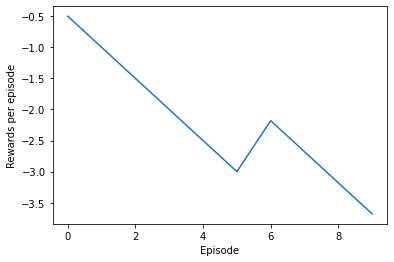

Total episode reward: -0.5000000000000003
Total episode reward: 0.6729999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.5 gamma 0.3


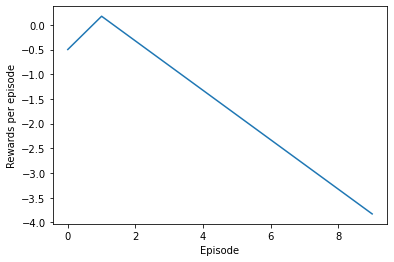

Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.5 gamma 0.6


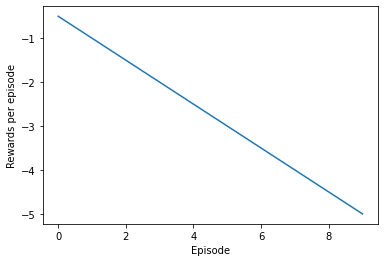

Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.5039999999999996
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.5 gamma 0.9


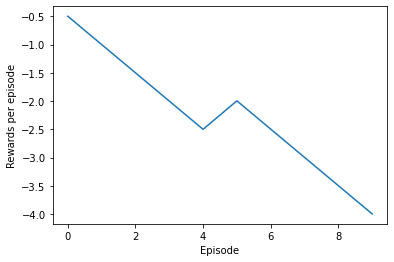

In [6]:
plt.plot(np.cumsum(get_rewards_per_episode(0.5, 0.1)))
print("epsilon 0.5 gamma 0.1")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

plt.plot(np.cumsum(get_rewards_per_episode(0.5, 0.3)))
print("epsilon 0.5 gamma 0.3")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

plt.plot(np.cumsum(get_rewards_per_episode(0.5, 0.6)))
print("epsilon 0.5 gamma 0.6")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

plt.plot(np.cumsum(get_rewards_per_episode(0.5, 0.9)))
print("epsilon 0.5 gamma 0.9")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()

## Optimistic initialisation

Know we know the best values for both gamma and episilon, we can use those and test if optimistic initialisation make a significant difference in cumulative reward.
<br>
<br>
Looking at the graph below, there appears to be no difference when using optimistic initialisation.

Total episode reward: 0.5689999999999997
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Video successfuly saved.
epsilon 0.9 gamma 0.1


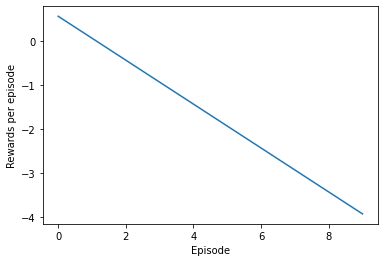

In [7]:

exploration_proba = 0.9  
discount_rate = 0.1

d = Display()
d.start()

video_name = "./vid/Task2_2C.mp4"

env = gym.make("maze-sample-10x10-v0")

vid = video_recorder.VideoRecorder(env, video_name)

current_state = env.reset()

states_dict = {} # dict to keep the states and coordinates of the Q table
count = 0
for i in range(10):
  for j in range(10):
    states_dict[i, j] = count
    count +=1

n_actions = env.action_space.n

Q_table = np.zeros((len(states_dict), n_actions))

# Number of episode we will run
n_episodes = 10

# Maximum of iteration per episode
max_iter_episode = 500


rewards_per_episode = list()

for e in range(n_episodes):
  done = False

  # Sum the rewards that the agent gets from the environment
  total_episode_reward = 0
  n = np.ones((len(states_dict), n_actions))
  

  for i in range(max_iter_episode):
    env.unwrapped.render()
    vid.capture_frame()

    current_coordinate_x = int(current_state[0])
    current_coordinate_y = int(current_state[1])

    current_Q_table_coordinates = states_dict[current_coordinate_x, current_coordinate_y]

    if np.random.uniform(0,1) < exploration_proba:
      action = env.action_space.sample()
    else:
      action = int(np.argmax(Q_table[current_Q_table_coordinates]))

    next_state, reward, done, _ = env.step(action)

    next_coordinate_x = int(next_state[0]) # get coordinates to be used in dictionary
    next_coordinate_y = int(next_state[1]) # get coordinates to be used in dictionary

    # Update our Q-table using the Q-value 
    n[current_Q_table_coordinates, action] = n[current_Q_table_coordinates, action] + 1
    next_Q_table_coordinates = states_dict[next_coordinate_x, next_coordinate_y]
    Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] + (1/n[current_Q_table_coordinates, action]) * (reward - (discount_rate * Q_table[current_Q_table_coordinates, action]))

    total_episode_reward = total_episode_reward + reward

    if done:
      break
    
    current_state = next_state
  
  #Show the total episode reward        
  print("Total episode reward:", total_episode_reward)
    
  #Reset enviroment for next episode
  current_state = env.reset()
    
  rewards_per_episode.append(total_episode_reward)

print("Video successfuly saved.")
vid.close()
vid.enabled = False

plt.plot(np.cumsum(rewards_per_episode))
print("epsilon 0.9 gamma 0.1")
plt.ylabel('Rewards per episode')
plt.xlabel('Episode')
plt.show()



# Results

From the experiments above we can see that exploitation allows use to earn more rewards (high epsilon value). A high discount rate, which means we ignore future values, make small improvements in solving this maze. Finally, optimisitc initialisation does not greatly improving solving this maze.